In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np


In [23]:
def TI_file2DF(file_name):
    step_stats = pd.DataFrame()
    root = ET.parse(file_name).getroot()
    #root = ET.parse('./Veh350_pufferFull_rebalanced_preshed_param2/' + file_name).getroot()
    # make person_kpi DataFrame
    for time_step in root.iter('step'):
        step_stats.loc[time_step.get('time'), 'time_hour'] = float(time_step.get('time'))/3600
        step_stats.loc[time_step.get('time'), 'stopped_veh'] = int(time_step.get('stopped'))
    return step_stats

       



In [27]:
step_stats = TI_file2DF('./Veh350_pufferFull_rebalanced_preshed/summary.xml')     

departures = pd.DataFrame()
root = ET.parse('./Veh350_pufferFull_rebalanced_preshed/tripinfo_output.xml').getroot()

for person_id in root.iter('personinfo'):
    i = 0
    for ride_id in person_id.iter('ride'):
        departures.loc[person_id.get('id') + '_' + str(i), 'departure'] = float(ride_id.get('depart')) / 3600
        departures.loc[person_id.get('id') + '_' + str(i), 'duration'] = float(ride_id.get('duration'))
        departures.loc[person_id.get('id') + '_' + str(i), 'route_length'] = float(ride_id.get('routeLength'))


(0.0, 550.0)

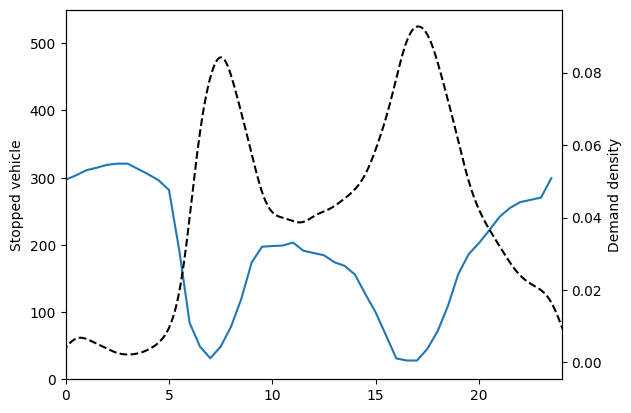

In [28]:
anz_stoped = []
for h in np.arange(0,24,0.5):
    subset = step_stats[step_stats['time_hour']<(h+1)]
    subset = subset[subset['time_hour']>h]
    anz_stoped.append(subset.stopped_veh.mean())

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

subset.head()



ax1.plot([*np.arange(0,24,0.5)], anz_stoped)
ax1.set_ylabel('Stopped vehicle')
departures['departure'].plot.density(color='k', alpha=1, bw_method=0.1, zorder=3, style='--', ax=ax2)
ax2.set_ylabel('Demand density')

plt.xlim(0,24)
ax1.set_ylim(0,550)